<a href="https://colab.research.google.com/github/Himasri17/Sentimental_Analysis/blob/main/sentimental_analysis_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/train.csv", encoding='latin1')
test = pd.read_csv("/content/test.csv", encoding='latin1')

# Concatenate training and testing datasets
df = pd.concat([df, test])

# Drop unnecessary columns
df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)', "selected_text"], axis=1, inplace=True)
# Drop rows with missing values
df.dropna(inplace=True)

# Basic text preprocessing
def preprocess_text(text):
    # Remove special characters and URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Encode the target variable
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

# Split the dataset
X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Logistic Regression Model

Accuracy: 0.6933741737868773
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.60      0.65      1749
     neutral       0.62      0.75      0.68      2502
    positive       0.79      0.70      0.74      1952

    accuracy                           0.69      6203
   macro avg       0.71      0.68      0.69      6203
weighted avg       0.70      0.69      0.69      6203



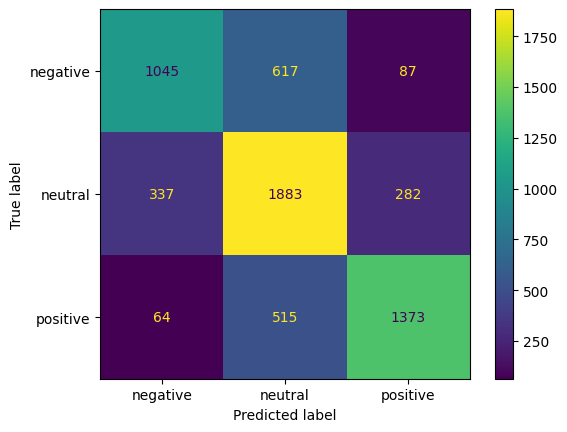

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Train Logistic Regression
lr = LogisticRegression(C=1, n_jobs=-1, random_state=42)
lr.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_)

Manual Testing

In [ ]:
def manual_testing(text):
    # Preprocess the input text
    text = preprocess_text(text)
    text_vectorized = tfidf.transform([text])

    # Predict sentiment
    pred = lr.predict(text_vectorized)
    sentiment = encoder.inverse_transform(pred)[0]

    return f"{sentiment}"

# Test the function
text = input("Enter a text: ")
print(manual_testing(text))

Enter a text: iam sad
negative
